In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
cd 713/

/content/drive/MyDrive/713


In [4]:
cd PMF_Raw Date_QueenSt_PM10/

/content/drive/MyDrive/713/PMF_Raw Date_QueenSt_PM10


# Data Extraction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel("PMF_Raw Date_QueenSt_PM10.xlsx")

In [7]:
# Replace all missing values with 0
df.fillna(0, inplace=True)

# Save the modified DataFrame back to an Excel file
df.to_excel('PMF_Raw Date_QueenSt_PM10.xlsx', index=False)

In [8]:
dtypes = df.dtypes
print(dtypes)

**** Error Estimation Summary ****    object
Unnamed: 1                            object
Unnamed: 2                            object
Unnamed: 3                            object
Unnamed: 4                            object
Unnamed: 5                            object
Unnamed: 6                            object
Unnamed: 7                            object
Unnamed: 8                            object
Unnamed: 9                            object
Unnamed: 10                           object
Unnamed: 11                            int64
Unnamed: 12                           object
Unnamed: 13                           object
Unnamed: 14                           object
dtype: object


In [9]:
df.head(50)

,**** Error Estimation Summary ****,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Time of run:,2023-12-18 09:45:13.101000,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Concentration file:,\\aklc.govt.nz\Data\users4\BoampoL\Desktop\PM1...,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Uncertainty file:,\\aklc.govt.nz\Data\users4\BoampoL\Desktop\PM1...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Configuration file:,\\aklc.govt.nz\Data\users4\BoampoL\Desktop\PM1...,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,DISP Displaced Species:,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,H,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,BC,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,Na,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
!pip install openpyxl

In [11]:
from openpyxl import Workbook, load_workbook

# create new workbook
wb_new = Workbook()
ws_new = wb_new.active

# set up titles
columns_titles = {
    'A': 'Species',
    'B': 'Soils_C', 'C': 'Soils_A', 'D': 'Soils_error', 'E': 'Soils_DISP', 'F': 'Soils_E',
    'G': 'Sulphate_C', 'H': 'Sulphate_A', 'I': 'Sulphate_error', 'J': 'Sulphate_DISP', 'K': 'Sulphate_E',
    'L': 'Diesel vehicles_C', 'M': 'Diesel vehicles_A', 'N': 'Diesel vehicles_error', 'O': 'Diesel vehicles_DISP', 'P': 'Diesel vehicles_E',
    'Q': 'Marine aerosol_C', 'R': 'Marine aerosol_A', 'S': 'Marine aerosol_error', 'T': 'Marine aerosol_DISP', 'U': 'Marine aerosol_E',
    'V': 'Biomass burning_C', 'W': 'Biomass burning_A', 'X': 'Biomass burning_error', 'Y': 'Biomass burning_DISP', 'Z': 'Biomass burning_E',
    'AA': 'Petrol vehicles_C', 'AB': 'Petrol vehicles_A', 'AC': 'Petrol vehicles_error', 'AD': 'Petrol vehicles_DISP', 'AE': 'Petrol vehicles_E',
    'AF': 'Construction_C', 'AG': 'Construction_A', 'AH': 'Construction_error', 'AI': 'Construction_DISP', 'AJ': 'Construction_E'
}
for col, title in columns_titles.items():
    ws_new[col + '1'] = title

# add exsiting workbook
wb = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws = wb.active

# copy raw1.xlsx to raw3.xlsx

for i in range(57, 77):
    value = ws['A' + str(i)].value
    ws_new['A' + str(i - 55)] = value

# save into new workbook
wb_new.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

In [12]:
df = pd.read_excel("PMF_Raw Date_QueenSt_PM10.xlsx", usecols="A:A", skiprows=56, nrows=21, header=None)
print(df)


     0
0    H
1   BC
2   Na
3   Mg
4   Al
5   Si
6    S
7   Cl
8    K
9   Ca
10  Ti
11   V
12  Mn
13  Fe
14  Co
15  Ni
16  Cu
17  Zn
18  As
19  Ba
20   0


Soil and road dust

In [13]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B56
divisor = ws1['B56'].value

# Calculate the values for column B in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(57, 77):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Calculate the result to be written in raw3.xlsx
    # Avoid division by zero
    result = (value / divisor) / 1000 if divisor else None
    # Write the result to column B in raw3.xlsx starting from row 2
    ws3[f'B{i-55}'] = result


# Calculate the values for column C in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(57, 77):
    # Get the value from column N in raw1.xlsx
    value_n = ws1[f'N{i}'].value
    # Calculate the result for column C in raw3.xlsx
    result_n = (value_n / divisor) / 1000 if divisor else None
    # Write the result to column C in raw3.xlsx starting from row 2
    ws3[f'C{i-55}'] = result_n

# Calculate the values for column D in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(57, 77):
    # Get the value from column M in raw1.xlsx
    value_m = ws1[f'M{i}'].value
    # Calculate the result for column D in raw3.xlsx
    result_m = (value_m / divisor) / 1000 if divisor else None
    # Write the result to column D in raw3.xlsx starting from row 2
    ws3[f'D{i-55}'] = result_m

# Calculate the values for column E in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(57, 77):
    # Get the value from column O in raw1.xlsx
    value_o = ws1[f'O{i}'].value
    # Calculate the result for column E in raw3.xlsx
    result_o = (value_o / divisor) / 1000 if divisor else None
    # Write the result to column E in raw3.xlsx starting from row 2
    ws3[f'E{i-55}'] = result_o

# Copy values from raw1.xlsx column B (from B225 to B244) to raw3.xlsx column F (from F2 to F21)
for i in range(225, 245):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column F in raw3.xlsx
    ws3[f'F{i-223}'] = value

# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Sulphate/marine diesel

In [14]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B200
divisor_1 = ws1['B200'].value

# Calculate the values for column G in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column B in raw1.xlsx (B201 to B220)
        value_g = ws1[f'B{200+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_g = (value_g / divisor_1) / 1000 if divisor else None
        # Write the result to column G in raw3.xlsx starting from row 2
        ws3[f'G{i+1}'] = result_g

# Calculate the values for column H in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column N in raw1.xlsx (N201 to N220)
        value_h = ws1[f'N{200+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_h = (value_h / divisor_1) / 1000 if divisor else None
        # Write the result to column H in raw3.xlsx starting from row 2
        ws3[f'H{i+1}'] = result_h


# Calculate the values for column I in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column M in raw1.xlsx (M201 to M220)
        value_I = ws1[f'M{200+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_I = (value_I / divisor_1) / 1000 if divisor else None
        # Write the result to column I in raw3.xlsx starting from row 2
        ws3[f'I{i+1}'] = result_I

# Calculate the values for column J in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column O in raw1.xlsx (O201 to O220)
        value_j = ws1[f'O{200+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_j = (value_j / divisor_1) / 1000 if divisor else None
        # Write the result to column J in raw3.xlsx starting from row 2
        ws3[f'j{i+1}'] = result_j

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column F (from K2 to K21)
for i in range(369, 389):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column K in raw3.xlsx
    ws3[f'K{i-367}'] = value


# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Diesel vehicles

In [15]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B200
divisor_3 = ws1['B104'].value

# Calculate the values for column L in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column B in raw1.xlsx (B105 to B124)
        value_l = ws1[f'B{104+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_l = (value_l / divisor_3) / 1000 if divisor else None
        # Write the result to column L in raw3.xlsx starting from row 2
        ws3[f'l{i+1}'] = result_l

# Calculate the values for column M in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column N in raw1.xlsx (N105 to N124)
        value_m = ws1[f'N{104+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_m = (value_m / divisor_3) / 1000 if divisor else None
        # Write the result to column H in raw3.xlsx starting from row 2
        ws3[f'm{i+1}'] = result_m


# Calculate the values for column N in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column M in raw1.xlsx (M105 to M124)
        value_n = ws1[f'M{104+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_n = (value_n / divisor_3) / 1000 if divisor else None
        # Write the result to column I in raw3.xlsx starting from row 2
        ws3[f'n{i+1}'] = result_n

# Calculate the values for column O in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column O in raw1.xlsx (O105 to O124)
        value_o = ws1[f'O{104+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_o = (value_o / divisor_3) / 1000 if divisor else None
        # Write the result to column J in raw3.xlsx starting from row 2
        ws3[f'o{i+1}'] = result_o

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column F (from K2 to K21)
for i in range(273, 293):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column K in raw3.xlsx
    ws3[f'P{i-271}'] = value


# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Sea salt

In [16]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B80
divisor_4 = ws1['B80'].value

# Calculate the values for column Q in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column B in raw1.xlsx (B81 to B100)
        value_q = ws1[f'B{80+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_q = (value_q / divisor_4) / 1000 if divisor else None
        # Write the result to column L in raw3.xlsx starting from row 2
        ws3[f'q{i+1}'] = result_q

# Calculate the values for column R in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column N in raw1.xlsx (N81 to N100)
        value_r = ws1[f'N{80+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_r = (value_r / divisor_4) / 1000 if divisor else None
        # Write the result to column H in raw3.xlsx starting from row 2
        ws3[f'r{i+1}'] = result_r


# Calculate the values for column S in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column M in raw1.xlsx (M81 to M100)
        value_s = ws1[f'M{80+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_s = (value_s / divisor_4) / 1000 if divisor else None
        # Write the result to column I in raw3.xlsx starting from row 2
        ws3[f's{i+1}'] = result_s

# Calculate the values for column T in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
        # Get the value from column O in raw1.xlsx (O81 to O100)
        value_t = ws1[f'O{80+i}'].value
        # Calculate the result to be written in raw3.xlsx
        result_t = (value_t / divisor_4) / 1000 if divisor else None
        # Write the result to column J in raw3.xlsx starting from row 2
        ws3[f't{i+1}'] = result_t

# Copy values from raw1.xlsx column B (from B249 to B269) to raw3.xlsx column U
for i in range(249, 269):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column U in raw3.xlsx
    ws3[f'U{i-247}'] = value


# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Biomass burning

In [17]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B80
divisor_4 = ws1['B128'].value

# Calculate the values for column V in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column B in raw1.xlsx (B129 to B148)
    value_v = ws1[f'B{128+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_v = (value_v / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column V in raw3.xlsx starting from row 2
    ws3[f'V{i+1}'] = result_v

# Calculate the values for column W in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column N in raw1.xlsx (N129 to N148)
    value_w = ws1[f'N{128+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_w = (value_w / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column W in raw3.xlsx starting from row 2
    ws3[f'W{i+1}'] = result_w

# Calculate the values for column X in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column M in raw1.xlsx (M129 to M148)
    value_x = ws1[f'M{128+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_x = (value_x / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column X in raw3.xlsx starting from row 2
    ws3[f'X{i+1}'] = result_x

# Calculate the values for column Y in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column O in raw1.xlsx (O129 to O148)
    value_y = ws1[f'O{128+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_y = (value_y / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column Y in raw3.xlsx starting from row 2
    ws3[f'Y{i+1}'] = result_y

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column Z
for i in range(297, 317):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column Z in raw3.xlsx
    ws3[f'Z{i-295}'] = value

# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Petrol vehicles

In [18]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B80
divisor_4 = ws1['B176'].value

# Calculate the values for column V in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column B in raw1.xlsx (B129 to B148)
    value_aa = ws1[f'B{176+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_aa = (value_aa / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column V in raw3.xlsx starting from row 2
    ws3[f'AA{i+1}'] = result_aa

# Calculate the values for column W in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column N in raw1.xlsx (N129 to N148)
    value_ab = ws1[f'N{176+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ab = (value_ab / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column W in raw3.xlsx starting from row 2
    ws3[f'AB{i+1}'] = result_ab

# Calculate the values for column X in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column M in raw1.xlsx (M129 to M148)
    value_ac = ws1[f'M{176+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ac = (value_ac / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column X in raw3.xlsx starting from row 2
    ws3[f'AC{i+1}'] = result_ac

# Calculate the values for column Y in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column O in raw1.xlsx (O129 to O148)
    value_ad = ws1[f'O{176+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ad = (value_ad / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column Y in raw3.xlsx starting from row 2
    ws3[f'AD{i+1}'] = result_ad

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column Z
for i in range(345, 365):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column Z in raw3.xlsx
    ws3[f'AE{i-343}'] = value

# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

Construction

In [19]:
# Load the existing workbook for raw1.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for raw3.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws3 = wb3.active

# Get the divisor value which is in cell B80
divisor_4 = ws1['B152'].value

# Calculate the values for column V in raw3.xlsx using the values from column B in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column B in raw1.xlsx (B129 to B148)
    value_af = ws1[f'B{152+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_af = (value_af / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column V in raw3.xlsx starting from row 2
    ws3[f'AF{i+1}'] = result_af

# Calculate the values for column W in raw3.xlsx using the values from column N in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column N in raw1.xlsx (N129 to N148)
    value_ag = ws1[f'N{152+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ag = (value_ag / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column W in raw3.xlsx starting from row 2
    ws3[f'AG{i+1}'] = result_ag

# Calculate the values for column X in raw3.xlsx using the values from column M in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column M in raw1.xlsx (M129 to M148)
    value_ah = ws1[f'M{152+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ah = (value_ah / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column X in raw3.xlsx starting from row 2
    ws3[f'AH{i+1}'] = result_ah

# Calculate the values for column Y in raw3.xlsx using the values from column O in raw1.xlsx
for i in range(1, 21):  # Loop from 1 to 20 to fill rows 2 to 21 in raw3.xlsx
    # Get the value from column O in raw1.xlsx (O129 to O148)
    value_ai = ws1[f'O{152+i}'].value
    # Calculate the result to be written in raw3.xlsx
    result_ai = (value_ai / divisor_4) / 1000 if divisor_4 else None
    # Write the result to column Y in raw3.xlsx starting from row 2
    ws3[f'AI{i+1}'] = result_ai

# Copy values from raw1.xlsx column B (from B369 to B388) to raw3.xlsx column Z
for i in range(321, 341):
    # Get the value from column B in raw1.xlsx
    value = ws1[f'B{i}'].value
    # Write the value to column Z in raw3.xlsx
    ws3[f'AJ{i-319}'] = value

# Save the updated raw3.xlsx workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')

In [20]:
import pandas as pd
import panel as pn

# Cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():
    # Load data from the Excel file
    df = pd.read_excel('PMF_Raw Date_QueenSt_PM10_1.xlsx')
    pn.state.cache['data'] = df.copy()
else:
    df = pn.state.cache['data']


PMF_Raw Date_QueenSt_PM10_1.xslsx Sheet2 for Pie Chart

In [26]:
from openpyxl import load_workbook, Workbook

# Load the existing workbook for PMF_Raw Date_QueenSt_PM10.xlsx
wb1 = load_workbook('PMF_Raw Date_QueenSt_PM10.xlsx')
ws1 = wb1.active

# Load the existing workbook for PMF_Raw Date_QueenSt_PM10_1.xlsx
wb3 = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')

# Create a new worksheet in the existing workbook
ws3 = wb3.create_sheet(title='Sheet2')

# Set the values for A1 and B1
ws3.cell(row=1, column=1, value='Sources')  # Set 'Sources' in A1
ws3.cell(row=1, column=2, value='Percentage')  # Set 'Percentage' in B1

# Extract the required data from ws1
data_to_extract = {
    'B2': ws1.cell(row=224, column=2).value,  # B224
    'B3': ws1.cell(row=248, column=2).value,  # B248
    'B4': ws1.cell(row=272, column=2).value,  # B272
    'B5': ws1.cell(row=296, column=2).value,  # B296
    'B6': ws1.cell(row=320, column=2).value,  # B320
    'B7': ws1.cell(row=344, column=2).value,  # B344
    'B8': ws1.cell(row=368, column=2).value   # B368
}

# Data labels for column A
labels = ['Soil/Road dust',
    'Sea salt',
    'Diesel vehicles',
    'Biomass burning',
    'Construction',
    'Petrol vehicles',
    'Sulphate/Marine diesel'
]

# Update ws3 with the extracted data
for i, (key, value) in enumerate(data_to_extract.items()):
    ws3.cell(row=i + 2, column=2, value=value)  # Write to column B (2)
    ws3.cell(row=i + 2, column=1, value=labels[i])  # Write to column A (1)

# Save the updated workbook
wb3.save('PMF_Raw Date_QueenSt_PM10_1.xlsx')


# Data peparation

In [27]:
df

,Species,Soils_C,Soils_A,Soils_error,Soils_DISP,Soils_E,Sulphate_C,Sulphate_A,Sulphate_error,Sulphate_DISP,...,Petrol vehicles_C,Petrol vehicles_A,Petrol vehicles_error,Petrol vehicles_DISP,Petrol vehicles_E,Construction_C,Construction_A,Construction_error,Construction_DISP,Construction_E
0,H,0.000000,0.010873,0.000000,0.021746,0.000000,0.007134,0.005701,0.000000e+00,0.011402,...,0.000000,0.010970,0.000000e+00,0.021939,0.000000,0.000000,0.008794,0.000000e+00,0.017589,0.000000
1,BC,0.000000,0.120377,0.000000,0.240754,0.000000,0.403261,0.399043,3.465267e-01,0.451559,...,0.000000,0.183751,0.000000e+00,0.367501,0.000000,0.118070,0.373196,0.000000e+00,0.746392,1.083030
2,Na,0.083192,0.085751,0.048703,0.122799,3.730673,0.026358,0.041711,1.389517e-02,0.069527,...,0.019943,0.075248,0.000000e+00,0.150496,0.469262,0.000000,0.060645,0.000000e+00,0.121291,0.000000
3,Mg,0.016500,0.017235,0.012728,0.021742,7.928534,0.002137,0.003330,8.833244e-04,0.005777,...,0.000000,0.005634,0.000000e+00,0.011268,0.000000,0.007580,0.009328,0.000000e+00,0.018655,1.243343
4,Al,0.061037,0.063702,0.053509,0.073896,64.831200,0.001359,0.001707,0.000000e+00,0.003415,...,0.000000,0.005129,0.000000e+00,0.010259,0.000000,0.036552,0.031154,4.561781e-03,0.057747,13.252481
5,Si,0.132071,0.140772,0.114884,0.166660,57.442375,0.001068,0.003400,0.000000e+00,0.006801,...,0.005974,0.017243,0.000000e+00,0.034485,1.363480,0.192183,0.175256,1.040908e-01,0.246422,28.532198
6,S,0.068072,0.067381,0.056173,0.078589,16.093529,0.100903,0.101475,9.447137e-02,0.108478,...,0.000000,0.009290,0.000000e+00,0.018581,0.000000,0.000000,0.011454,0.000000e+00,0.022908,0.000000
7,Cl,0.000000,0.032410,0.000000,0.064821,0.000000,0.000000,0.030327,0.000000e+00,0.060653,...,0.020215,0.113973,0.000000e+00,0.227946,0.319848,0.220732,0.271452,1.167877e-01,0.426117,2.272003
8,K,0.010384,0.011919,0.009064,0.014774,8.281782,0.001426,0.001656,7.090289e-04,0.002604,...,0.014480,0.015975,1.223689e-02,0.019713,6.059775,0.016941,0.016380,1.163424e-02,0.021127,4.612172
9,Ca,0.000000,0.018205,0.000000,0.036410,0.000000,0.001363,0.006555,-1.444085e-19,0.013110,...,0.003365,0.029743,-1.147972e-18,0.059486,0.663939,0.438518,0.490169,3.323472e-01,0.647990,56.290432


In [28]:
##data perpare
sources = {
    'Soils': ['C', 'A', 'error', 'DISP', 'E'],
    'Sulphate': ['C', 'A', 'error', 'DISP', 'E'],
    'Diesel vehicles': ['C', 'A', 'error', 'DISP', 'E'],
    'Marine aerosol': ['C', 'A', 'error', 'DISP', 'E'],
    'Biomass burning': ['C', 'A', 'error', 'DISP', 'E'],
    'Petrol vehicles': ['C', 'A', 'error', 'DISP', 'E'],
    'Construction': ['C', 'A', 'error', 'DISP', 'E']
}

In [29]:
import pandas as pd

#create a dictionary for splitting df
dfs = {}
for source, measurements in sources.items():
    # conduct a list of pollution sources
    columns = ['Species'] + [f"{source}_{m}" for m in measurements]
    # rename each df name
    dfs[source] = df[columns].copy()
    #rename each column name
    new_columns = ['Species', "Concentration", "Average", "Error", "Dispersion", "Exceedance"]
    dfs[source].columns = new_columns

In [30]:
df1 = dfs['Soils']
df2 = dfs['Sulphate']
df3 = dfs['Diesel vehicles']
df4 = dfs['Marine aerosol']
df5 = dfs['Biomass burning']
df6 = dfs['Petrol vehicles']
df7 = dfs['Construction']

In [31]:
df1

,Species,Concentration,Average,Error,Dispersion,Exceedance
0,H,0.000000,0.010873,0.000000,0.021746,0.000000
1,BC,0.000000,0.120377,0.000000,0.240754,0.000000
2,Na,0.083192,0.085751,0.048703,0.122799,3.730673
3,Mg,0.016500,0.017235,0.012728,0.021742,7.928534
4,Al,0.061037,0.063702,0.053509,0.073896,64.831200
5,Si,0.132071,0.140772,0.114884,0.166660,57.442375
6,S,0.068072,0.067381,0.056173,0.078589,16.093529
7,Cl,0.000000,0.032410,0.000000,0.064821,0.000000
8,K,0.010384,0.011919,0.009064,0.014774,8.281782
9,Ca,0.000000,0.018205,0.000000,0.036410,0.000000


# Create SQLite DB

In [32]:
##drop database
import os

# delete database records
db_file = 'environmental_data.db'
if os.path.exists(db_file):
    os.remove(db_file)
    print(f"database records {db_file} have beed deleted。")
else:
    print(f"database records{db_file} does not exist。")

database records environmental_data.db have beed deleted。


In [33]:
import sqlite3

def create_db_and_tables(conn):
    cursor = conn.cursor()

    # create Species table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Species (
        SpeciesID INTEGER PRIMARY KEY AUTOINCREMENT,
        Species TEXT NOT NULL
    )
    ''')

    # Create PollutionSources table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS PollutionSources (
        SourceID TEXT PRIMARY KEY,
        Name TEXT NOT NULL
    )
    ''')
    # insert pollution sources
    sources = [
        ('P1', 'Soils/RoadDust'),
        ('P2', 'Sulphate/MarineDiesel'),
        ('P3', 'DieselVehicles'),
        ('P4', 'MarineAerosol'),
        ('P5', 'BiomassBurning'),
        ('P6', 'PetrolVehicles'),
        ('P7', 'Construction')
    ]
    cursor.executemany('INSERT OR IGNORE INTO PollutionSources (SourceID, Name) VALUES (?, ?)', sources)

    # create sample table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Samples (
        SampleID INTEGER PRIMARY KEY AUTOINCREMENT,
        Date TEXT NOT NULL,
        Time TEXT NOT NULL,
        Location TEXT NOT NULL
    )
    ''')

    # create Measurement table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Measurement (
        MeasurementID INTEGER PRIMARY KEY AUTOINCREMENT,
        SampleID INTEGER,
        SpeciesID INTEGER,
        SourceID TEXT,
        Concentration REAL,
        Average REAL,
        Error REAL,
        Dispersion REAL,
        Exceedance REAL,
        FOREIGN KEY (SampleID) REFERENCES Samples (SampleID),
        FOREIGN KEY (SpeciesID) REFERENCES Species (SpeciesID),
        FOREIGN KEY (SourceID) REFERENCES PollutionSources (SourceID)
    )
    ''')

    # confirm operation
    conn.commit()

# connect to SQLite database and create table
conn = sqlite3.connect('environmental_data.db')
create_db_and_tables(conn)
conn.close()

# Insert data to DB

**Species table**

In [34]:
def insert_species(df, conn):
    cursor = conn.cursor()

    # insert species to species table
    df[['Species']].to_sql('Species', conn, if_exists='append', index=False)

    # confirm
    conn.commit()

# connect to SQLite database and insert to species table
conn = sqlite3.connect('environmental_data.db')

insert_species(df, conn)
conn.close()

**Measurement Table**

In [35]:
import sqlite3
import pandas as pd

# connect to SQLite database
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# obtain all SpeciesID
cursor.execute('SELECT SpeciesID, Species FROM Species')
species_dict = {name: id for id, name in cursor.fetchall()}

# define insert data function
def insert_measurement(df, source_id, conn):
    try:
        cursor = conn.cursor()
        # insert data
        for index, row in df.iterrows():
            # obtain SpeciesID
            species_id = species_dict.get(row['Species'])
            if species_id is None:
                print(f"Species {row['Species']} not found in Species table.")
                continue

            # insert Measurement data
            cursor.execute('''
            INSERT INTO Measurement (SampleID, SpeciesID, SourceID, Concentration, Average, Error, Dispersion, Exceedance)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
            ''', (1, species_id, source_id,
                  row['Concentration'], row['Average'], row['Error'], row['Dispersion'], row['Exceedance']))

        # confirm
        conn.commit()
    except sqlite3.Error as e:
        print("SQLite error: ", e)
    except Exception as e:
        print("General error: ", e)



# insert data
source_ids = {
    'Soils': 'P1',
    'Sulphate': 'P2',
    'Diesel vehicles': 'P3',
    'Marine aerosol': 'P4',
    'Biomass burning': 'P5',
    'Petrol vehicles': 'P6',
    'Construction': 'P7'
}

dfs = {
    'Soils': df1,
    'Sulphate': df2,
    'Diesel vehicles': df3,
    'Marine aerosol': df4,
    'Biomass burning': df5,
    'Petrol vehicles': df6,
    'Construction': df7
}

for source, df in dfs.items():
    source_id = source_ids[source]
    insert_measurement(df, source_id, conn)

# close connection
conn.close()

**Testing**

In [36]:
import sqlite3

# 连接到SQLite数据库
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# 检查表是否存在
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='Species'")
species_table_exists = cursor.fetchone()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='Measurement'")
measurement_table_exists = cursor.fetchone()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='PollutionSources'")
pollution_sources_table_exists = cursor.fetchone()

# 根据表是否存在打印信息
print("Species Table Exists:", species_table_exists is not None)
print("Measurement Table Exists:", measurement_table_exists is not None)
print("PollutionSources Table Exists:", pollution_sources_table_exists is not None)

# 如果表存在，查询表中的所有数据
if species_table_exists:
    print("Species Table Data:")
    cursor.execute('SELECT * FROM Species')
    species_data = cursor.fetchall()
    for row in species_data:
        print(row)

if measurement_table_exists:
    print("\nMeasurement Table Data:")
    cursor.execute('SELECT * FROM Measurement')
    measurement_data = cursor.fetchall()
    for row in measurement_data:
        print(row)

if pollution_sources_table_exists:
    print("\nPollutionSources Table Data:")
    cursor.execute('SELECT * FROM PollutionSources')
    pollution_sources_data = cursor.fetchall()
    for row in pollution_sources_data:
        print(row)

# 关闭数据库连接
conn.close()

Species Table Exists: True
Measurement Table Exists: True
PollutionSources Table Exists: True
Species Table Data:
(1, 'H')
(2, 'BC')
(3, 'Na')
(4, 'Mg')
(5, 'Al')
(6, 'Si')
(7, 'S')
(8, 'Cl')
(9, 'K')
(10, 'Ca')
(11, 'Ti')
(12, 'V')
(13, 'Mn')
(14, 'Fe')
(15, 'Co')
(16, 'Ni')
(17, 'Cu')
(18, 'Zn')
(19, 'As')
(20, 'Ba')

Measurement Table Data:
(1, 1, 1, 'P1', 0.0, 0.01087282494754106, 0.0, 0.02174564964605561, 0.0)
(2, 1, 2, 'P1', 0.0, 0.1203767920496624, 0.0, 0.2407535853444583, 0.0)
(3, 1, 3, 'P1', 0.08319223158367164, 0.08575092994971502, 0.0487025439115445, 0.1227993227116016, 3.73067259788513)
(4, 1, 4, 'P1', 0.016499724596585, 0.01723464333604225, 0.01272771782370101, 0.02174156959546298, 7.92853355407715)
(5, 1, 5, 'P1', 0.06103653685305697, 0.06370233928644851, 0.05350884350965952, 0.07389583630837022, 64.8311996459961)
(6, 1, 6, 'P1', 0.1320712376833472, 0.1407719399690283, 0.1148840245619046, 0.1666598665823456, 57.4423751831055)
(7, 1, 7, 'P1', 0.06807156408739469, 0.0673810

In [37]:
import sqlite3

# 连接到SQLite数据库
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# 查询Measurement表中的所有数据
cursor.execute('SELECT * FROM Measurement')
measurement_data = cursor.fetchall()

# 打印查询结果
print("Measurement Table Data:")
for row in measurement_data:
    print(row)



Measurement Table Data:
(1, 1, 1, 'P1', 0.0, 0.01087282494754106, 0.0, 0.02174564964605561, 0.0)
(2, 1, 2, 'P1', 0.0, 0.1203767920496624, 0.0, 0.2407535853444583, 0.0)
(3, 1, 3, 'P1', 0.08319223158367164, 0.08575092994971502, 0.0487025439115445, 0.1227993227116016, 3.73067259788513)
(4, 1, 4, 'P1', 0.016499724596585, 0.01723464333604225, 0.01272771782370101, 0.02174156959546298, 7.92853355407715)
(5, 1, 5, 'P1', 0.06103653685305697, 0.06370233928644851, 0.05350884350965952, 0.07389583630837022, 64.8311996459961)
(6, 1, 6, 'P1', 0.1320712376833472, 0.1407719399690283, 0.1148840245619046, 0.1666598665823456, 57.4423751831055)
(7, 1, 7, 'P1', 0.06807156408739469, 0.06738101359463697, 0.05617311654664518, 0.07858891450253983, 16.0935287475586)
(8, 1, 8, 'P1', 0.0, 0.03241039177991034, 0.0, 0.06482078377771884, 0.0)
(9, 1, 9, 'P1', 0.0103837287582366, 0.01191889880524001, 0.009063934392786471, 0.01477386319590363, 8.28178215026855)
(10, 1, 10, 'P1', 0.0, 0.0182051853085068, 0.0, 0.036410371

In [38]:
# 查询Species表中的所有数据
cursor.execute('SELECT SpeciesID, Species FROM Species')
species_data = cursor.fetchall()
species_dict = {id: name for id, name in species_data}

# 查询PollutionSources表中的所有数据
cursor.execute('SELECT SourceID, Name FROM PollutionSources')
sources_data = cursor.fetchall()
sources_dict = {id: name for id, name in sources_data}

# 打印Measurement表中的数据，并验证SpeciesID和SourceID
print("Measurement Table Data with Validation:")
for row in measurement_data:
    species_name = species_dict.get(row[2], "Unknown SpeciesID")
    source_name = sources_dict.get(row[3], "Unknown SourceID")
    print(f"MeasurementID: {row[0]}, SampleID: {row[1]}, SpeciesID: {row[2]} ({species_name}), SourceID: {row[3]} ({source_name})")

Measurement Table Data with Validation:
MeasurementID: 1, SampleID: 1, SpeciesID: 1 (H), SourceID: P1 (Soils/RoadDust)
MeasurementID: 2, SampleID: 1, SpeciesID: 2 (BC), SourceID: P1 (Soils/RoadDust)
MeasurementID: 3, SampleID: 1, SpeciesID: 3 (Na), SourceID: P1 (Soils/RoadDust)
MeasurementID: 4, SampleID: 1, SpeciesID: 4 (Mg), SourceID: P1 (Soils/RoadDust)
MeasurementID: 5, SampleID: 1, SpeciesID: 5 (Al), SourceID: P1 (Soils/RoadDust)
MeasurementID: 6, SampleID: 1, SpeciesID: 6 (Si), SourceID: P1 (Soils/RoadDust)
MeasurementID: 7, SampleID: 1, SpeciesID: 7 (S), SourceID: P1 (Soils/RoadDust)
MeasurementID: 8, SampleID: 1, SpeciesID: 8 (Cl), SourceID: P1 (Soils/RoadDust)
MeasurementID: 9, SampleID: 1, SpeciesID: 9 (K), SourceID: P1 (Soils/RoadDust)
MeasurementID: 10, SampleID: 1, SpeciesID: 10 (Ca), SourceID: P1 (Soils/RoadDust)
MeasurementID: 11, SampleID: 1, SpeciesID: 11 (Ti), SourceID: P1 (Soils/RoadDust)
MeasurementID: 12, SampleID: 1, SpeciesID: 12 (V), SourceID: P1 (Soils/RoadDust

In [39]:
import sqlite3

# 连接到SQLite数据库
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# 查询H在Construction中的Concentration
cursor.execute("""
SELECT Concentration
FROM Measurement
WHERE SpeciesID = (SELECT SpeciesID FROM Species WHERE Species = 'Ba')
AND SourceID = (SELECT SourceID FROM PollutionSources WHERE Name = 'Construction');
""")

# 获取查询结果
concentration_data = cursor.fetchall()

# 打印查询结果
print("Concentration of Ba in Construction:")
for concentration in concentration_data:
    print(concentration[0])

# 关闭数据库连接
conn.close()

Concentration of Ba in Construction:
0.001384730315254744


In [40]:
import sqlite3

# 连接到SQLite数据库
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# 查询H在Construction中的Average
cursor.execute("""
SELECT Average
FROM Measurement
WHERE SpeciesID = (SELECT SpeciesID FROM Species WHERE Species = 'Ba')
AND SourceID = (SELECT SourceID FROM PollutionSources WHERE Name = 'Construction');
""")

# 获取查询结果
average_data = cursor.fetchall()

# 打印查询结果
print("Average of Ba in Construction:")
for average in average_data:
    print(average[0])

# 关闭数据库连接
conn.close()

Average of Ba in Construction:
0.002288958532258425


In [41]:
import sqlite3

# 连接到SQLite数据库
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# 查询H在Construction中的Error
cursor.execute("""
SELECT Error
FROM Measurement
WHERE SpeciesID = (SELECT SpeciesID FROM Species WHERE Species = 'Al')
AND SourceID = (SELECT SourceID FROM PollutionSources WHERE Name = 'Construction');
""")

# 获取查询结果
error_data = cursor.fetchall()

# 打印查询结果
print("Error of Al in Construction:")
for error in error_data:
    print(error[0])

# 关闭数据库连接
conn.close()

Error of Al in Construction:
0.004561780965187509


In [42]:
import sqlite3

# 连接到SQLite数据库
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# 查询H在Construction中的Dispersion
cursor.execute("""
SELECT Dispersion
FROM Measurement
WHERE SpeciesID = (SELECT SpeciesID FROM Species WHERE Species = 'H')
AND SourceID = (SELECT SourceID FROM PollutionSources WHERE Name = 'Construction');
""")

# 获取查询结果
dispersion_data = cursor.fetchall()

# 打印查询结果
print("Dispersion of H in Construction:")
for dispersion in dispersion_data:
    print(dispersion[0])

# 关闭数据库连接
conn.close()

Dispersion of H in Construction:
0.01758852532496638


In [43]:
import sqlite3

# 连接到SQLite数据库
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# 查询H在Construction中的Exceedance
cursor.execute("""
SELECT Exceedance
FROM Measurement
WHERE SpeciesID = (SELECT SpeciesID FROM Species WHERE Species = 'H')
AND SourceID = (SELECT SourceID FROM PollutionSources WHERE Name = 'Construction');
""")

# 获取查询结果
exceedance_data = cursor.fetchall()

# 打印查询结果
print("Exceedance of H in Construction:")
for exceedance in exceedance_data:
    print(exceedance[0])

# 关闭数据库连接
conn.close()

Exceedance of H in Construction:
0.0


In [44]:
# 连接到SQLite数据库
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# 查询P1对应的所有记录的前五个值的位置
cursor.execute("""
SELECT  Concentration, Average, Error, Dispersion, Exceedance
FROM Measurement
WHERE SourceID = 'P1';
""")

# 获取查询结果
results = cursor.fetchall()

# 打印查询结果
print("five values for P1:")
for result in results:
    print(result)

# 关闭数据库连接
conn.close()

five values for P1:
(0.0, 0.01087282494754106, 0.0, 0.02174564964605561, 0.0)
(0.0, 0.1203767920496624, 0.0, 0.2407535853444583, 0.0)
(0.08319223158367164, 0.08575092994971502, 0.0487025439115445, 0.1227993227116016, 3.73067259788513)
(0.016499724596585, 0.01723464333604225, 0.01272771782370101, 0.02174156959546298, 7.92853355407715)
(0.06103653685305697, 0.06370233928644851, 0.05350884350965952, 0.07389583630837022, 64.8311996459961)
(0.1320712376833472, 0.1407719399690283, 0.1148840245619046, 0.1666598665823456, 57.4423751831055)
(0.06807156408739469, 0.06738101359463697, 0.05617311654664518, 0.07858891450253983, 16.0935287475586)
(0.0, 0.03241039177991034, 0.0, 0.06482078377771884, 0.0)
(0.0103837287582366, 0.01191889880524001, 0.009063934392786471, 0.01477386319590363, 8.28178215026855)
(0.0, 0.0182051853085068, 0.0, 0.03641037148860646, 0.0)
(0.005614863624308941, 0.005899650935441493, 0.004711744425630877, 0.007087557885717783, 58.6095848083496)
(0.0, 3.255064259491003e-05, 0.0, 

Step 1: Extract Data and Connect to SQLite- Pie Chart

In [46]:
import sqlite3
from openpyxl import load_workbook

# Load the existing workbook PMF_Raw Date_QueenSt_PM10_1.xlsx and the specific sheet
wb = load_workbook('PMF_Raw Date_QueenSt_PM10_1.xlsx')
ws = wb['Sheet2']  # Make sure you’re pointing to the correct sheet

# Set up a new SQLite database
conn = sqlite3.connect('PMF_QueenSt_PM10_1.db')
cursor = conn.cursor()

# Create the new table for the data, only selecting column headers without inserting actual values
cursor.execute('''
    CREATE TABLE IF NOT EXISTS PollutionSources (
        Source TEXT,
        Percentage REAL
    )
''')
conn.commit()

Step 2: Insert Data (Without Actual Values for Percentage)

In [47]:
# Start from the second row, as the first row contains headers
for row in ws.iter_rows(min_row=2, max_col=2, values_only=True):
    source = row[0]
    # Insert source with a NULL value for Percentage
    cursor.execute("INSERT INTO PollutionSources (Source, Percentage) VALUES (?, NULL)", (source,))

conn.commit()
conn.close()


Step 2: Insert Actual Values for Percentage

In [48]:
# Data labels for column A
labels = [
    'Soil/Road dust',
    'Sea salt',
    'Diesel vehicles',
    'Biomass burning',
    'Construction',
    'Petrol vehicles',
    'Sulphate/Marine diesel'
]

# Connect to the SQLite database (assuming it already exists)
conn = sqlite3.connect('PMF_QueenSt_PM10_1.db')
cursor = conn.cursor()

# Insert the extracted data into the SQLite table
for i, label in enumerate(labels):
    percentage = data_to_extract[f'B{i+2}']  # B2 corresponds to index 0, etc.
    cursor.execute("UPDATE PollutionSources SET Percentage = ? WHERE Source = ?", (percentage, label))

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Data successfully inserted into the SQLite database.")

Data successfully inserted into the SQLite database.


Testing

In [49]:
# Reopen the connection to verify the data
conn = sqlite3.connect('PMF_QueenSt_PM10_1.db')
cursor = conn.cursor()

# Retrieve and print the data for verification
cursor.execute("SELECT * FROM PollutionSources")
rows = cursor.fetchall()
for row in rows:
    print(row)

conn.close()

('Soil/Road dust', 6.07627725601196)
('Sea salt', 42.2844161987305)
('Diesel vehicles', 24.2120170593262)
('Biomass burning', 11.8063411712646)
('Construction', 2.07412052154541)
('Petrol vehicles', 3.18831324577332)
('Sulphate/Marine diesel', 10.3585166931152)


# Visualization

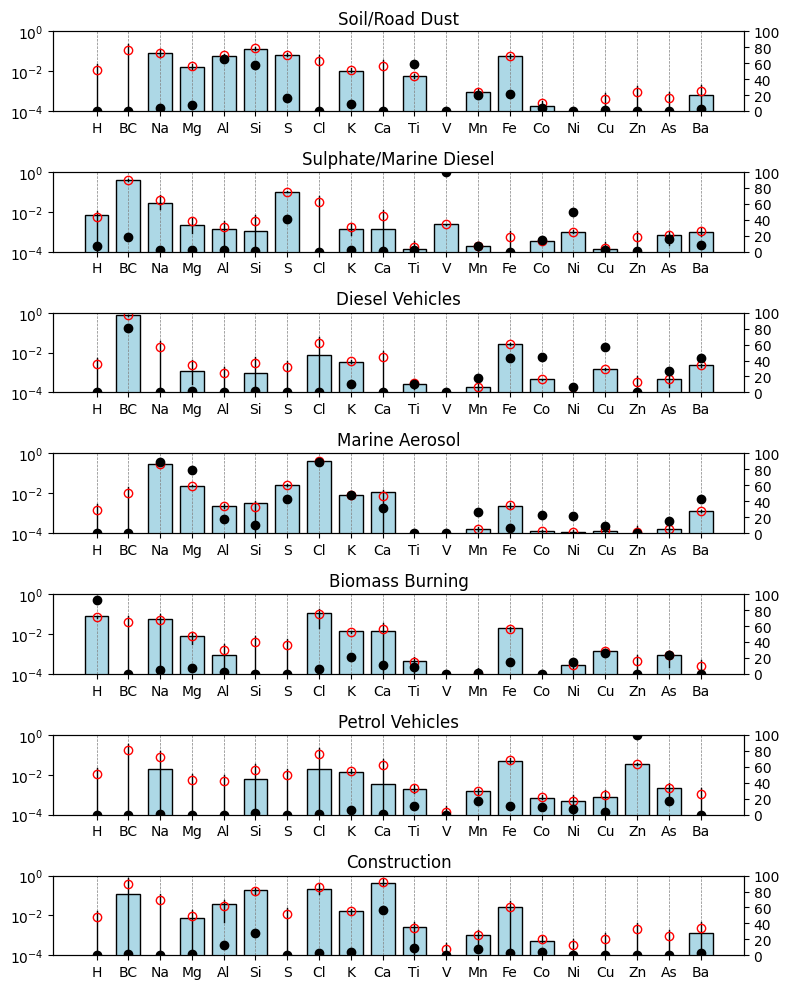

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from matplotlib.ticker import FuncFormatter

# Connect to SQLite database
conn = sqlite3.connect('environmental_data.db')
cursor = conn.cursor()

# Species Table Data
species_ids = list(range(1, 21))
species_names = {
    1: 'H', 2: 'BC', 3: 'Na', 4: 'Mg',
    5: 'Al', 6: 'Si', 7: 'S', 8: 'Cl',
    9: 'K', 10: 'Ca', 11: 'Ti', 12: 'V',
    13: 'Mn', 14: 'Fe', 15: 'Co', 16: 'Ni',
    17: 'Cu', 18: 'Zn', 19: 'As', 20: 'Ba'
}

# Query data for each source P1 through P7
sources = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']
source_titles = [
    'Soil/Road Dust', 'Sulphate/Marine Diesel', 'Diesel Vehicles',
    'Marine Aerosol', 'Biomass Burning', 'Petrol Vehicles', 'Construction'
]
data = {}

for source in sources:
    cursor.execute(f"""
    SELECT SpeciesID, Concentration, Average, Error, Dispersion, Exceedance
    FROM Measurement
    WHERE SourceID = '{source}'
    """)
    data[source] = cursor.fetchall()

# Close the database connection
conn.close()

# Plot setup
fig, axes = plt.subplots(len(sources), 1, figsize=(8, 10), sharex=False)
x = np.arange(len(species_ids))  # Label locations
width = 0.75  # Width of the bars

for i, (source, title) in enumerate(zip(sources, source_titles)):
    ax = axes[i]
    source_data = data[source]

    # Extract data for plotting
    concentration = [row[1] for row in source_data]
    average = [row[2] for row in source_data]
    error = [row[3] for row in source_data]
    dispersion = [row[4] for row in source_data]
    exceedance = [row[5] for row in source_data]

    # Logarithmic y-axis for concentration
    ax.set_yscale('log')
    ax.set_ylim([1e-4, 1])

    # Format left y-axis ticks to display as scientific notation (10^0, 10^-2, etc.)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'$10^{{{int(np.log10(y))}}}$'))

    # Right y-axis (percentage scale) for Exceedance
    ax2 = ax.twinx()
    ax2.set_ylim([0, 100])
    ax2.set_yticks(np.arange(0, 101, 20))

    # Background vertical lines
    for j in x:
        ax.vlines(j, 1e-4, 1, colors='gray', linestyles='dashed', lw=0.5)

    # Concentration bars
    ax.bar(x, concentration, width, color='lightblue', edgecolor='black', label=f'Concentration {source}')

    # Error and Dispersion as vertical lines
    for j in range(len(x)):
        ax.plot([x[j], x[j]], [error[j], dispersion[j]], color='black', lw=1)

    # Average as hollow dots
    ax.plot(x, average, color='red', marker='o', markersize=6, linestyle='', markerfacecolor='none', label=f'Average {source}')

    # Exceedance as green dots
    ax2.plot(x, exceedance, color='black', marker='o', markersize=6, linestyle='', label=f'Exceedance {source}')

    # Set title for each subplot
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels([species_names[sid] for sid in species_ids], rotation=0)



plt.tight_layout()
plt.show()


In [51]:
pip install matplotlib


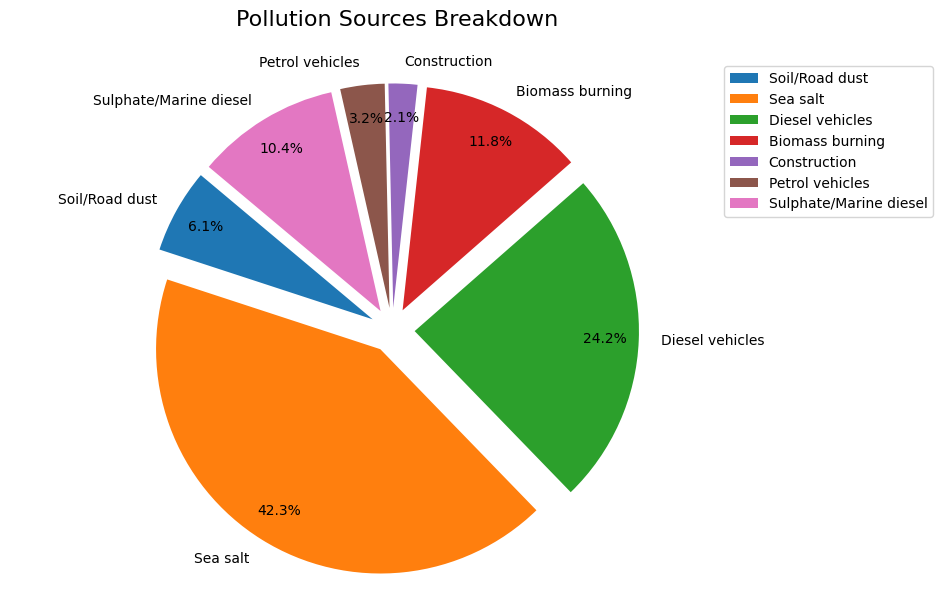

In [59]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('PMF_QueenSt_PM10_1.db')
cursor = conn.cursor()

# Retrieve the data for the pie chart
cursor.execute("SELECT Source, Percentage FROM PollutionSources")
data = cursor.fetchall()

# Close the database connection
conn.close()

# Separate the data into labels and sizes
labels = [row[0] for row in data]
sizes = [row[1] for row in data]

# Create a 2D pie chart
plt.figure(figsize=(10, 7),facecolor=(1, 1, 1, 0.5))

# Create the pie chart with a slight explode effect for better visibility
explode = [0.1] * len(labels)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Add a legend
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.2, 1))

# Title for the pie chart
plt.title('Pollution Sources Breakdown', fontsize=16, pad=24)

# Show the plot
plt.show()

